In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pumpkins = pd.read_csv('../data/US-pumpkins.csv')


pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [15]:
pumpkins.isnull().sum()

Package       0
Date          0
Low Price     0
High Price    0
dtype: int64

In [16]:
needed_cols = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in needed_cols], axis=1)
pumpkins.head()

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.0,15.0
71,1 1/9 bushel cartons,9/24/16,18.0,18.0
72,1 1/9 bushel cartons,10/1/16,18.0,18.0
73,1 1/9 bushel cartons,10/1/16,17.0,17.0
74,1 1/9 bushel cartons,10/8/16,15.0,15.0


In [17]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

print("price", price)
print("month", month)

price 70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64
month Int64Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=415)


In [18]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


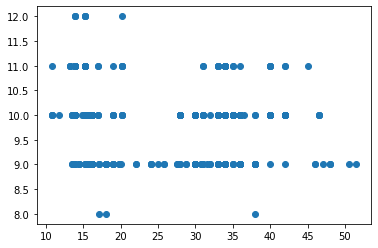

In [19]:
price = new_pumpkins.Price
month = new_pumpkins.Month

plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin price')

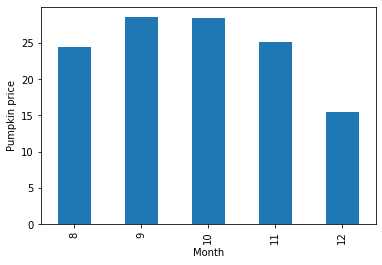

In [20]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin price")

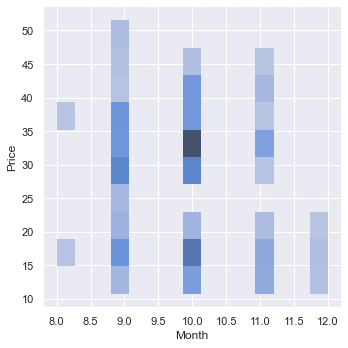

In [30]:
sb.set_theme()
sb.displot(data=new_pumpkins, x='Month', y='Price')